In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load dataset
df = pd.read_csv("IMDB_Dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# 3. Encode target variable (positive -> 1, negative -> 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [3]:
# 5. Tokenize and pad text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [4]:
# 6. Build DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)

c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1250/1250 - 6s - 5ms/step - accuracy: 0.7761 - loss: 0.4751 - val_accuracy: 0.8428 - val_loss: 0.3452
Epoch 2/10
1250/1250 - 5s - 4ms/step - accuracy: 0.8798 - loss: 0.2935 - val_accuracy: 0.8763 - val_loss: 0.2921
Epoch 3/10
1250/1250 - 5s - 4ms/step - accuracy: 0.8993 - loss: 0.2533 - val_accuracy: 0.8695 - val_loss: 0.3044
Epoch 4/10
1250/1250 - 5s - 4ms/step - accuracy: 0.9081 - loss: 0.2315 - val_accuracy: 0.8791 - val_loss: 0.2943
Epoch 5/10
1250/1250 - 4s - 3ms/step - accuracy: 0.9158 - loss: 0.2147 - val_accuracy: 0.8753 - val_loss: 0.3068
Epoch 6/10
1250/1250 - 5s - 4ms/step - accuracy: 0.9219 - loss: 0.2010 - val_accuracy: 0.8672 - val_loss: 0.3319
Epoch 7/10
1250/1250 - 9s - 8ms/step - accuracy: 0.9273 - loss: 0.1911 - val_accuracy: 0.8705 - val_loss: 0.3303
Epoch 8/10
1250/1250 - 4s - 3ms/step - accuracy: 0.9273 - loss: 0.1881 - val_accuracy: 0.8658 - val_loss: 0.3397
Epoch 9/10
1250/1250 - 5s - 4ms/step - accuracy: 0.9348 - loss: 0.1734 - val_accuracy: 0.8623 - 

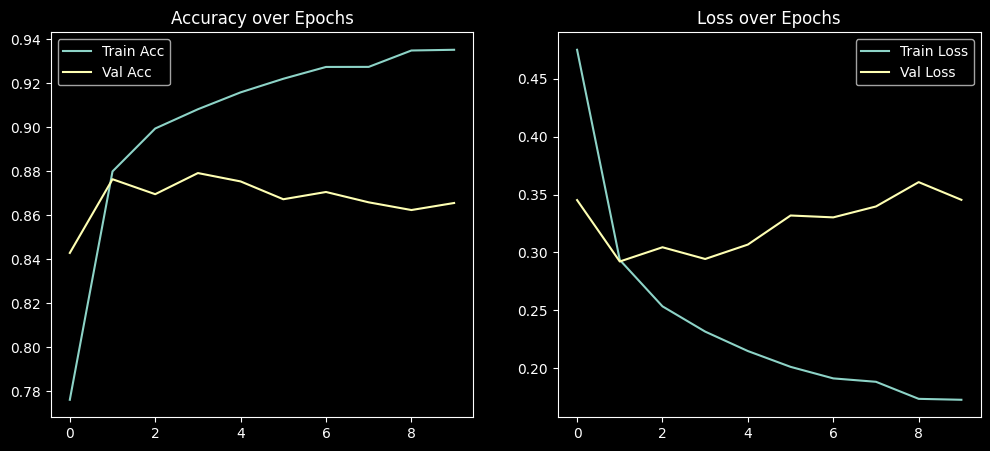

In [5]:
# 8. Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

In [6]:
# 9. Predictions and thresholding
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      4961
    Positive       0.86      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



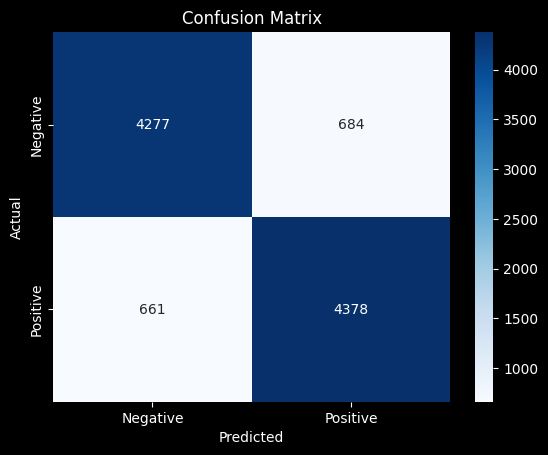

In [7]:
# 10. Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# 11. Show 10 actual reviews and predicted sentiment
sample_reviews = X_test.reset_index(drop=True)[:10]
sample_preds = y_pred[:10]
sample_true = y_test.reset_index(drop=True)[:10]

for i in range(10):
    print(f"\nReview {i+1}:\n{sample_reviews[i][:300]}...")  # print only first 300 chars
    print(f"Actual Sentiment   : {'Positive' if sample_true[i] == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if sample_preds[i] == 1 else 'Negative'}")



Review 1:
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok ...
Actual Sentiment   : Positive
Predicted Sentiment: Negative

Review 2:
Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you can think of that just adore this T.V miniseries. It has elements that can be found in almost every ot...
Actual Sentiment   : Positive
Predicted Sentiment: Positive

Review 3:
The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole p